# 2 - Análisis de datos agrícolas

En este ejemplo se analizan datos de los **4 cultivos de exportación principales de la Argentina: soja, girasol, trigo y maíz.**

In [2]:
from __future__ import unicode_literals
import pandas as pd
import numpy as np
import requests
import json
import shutil
from matplotlib import pyplot as plt

#plt.style.use("ggplot")



## 2.1 - Conseguir los datos
El primer paso es armar un conjunto de datos para luego hacer análisis. En este ejemplo vamos a usar dos tipos de fuentes de datos: una **API** y un **Portal de Datos**.

### Portal de Datos Abiertos de Agroindustria 

Descargamos datos de producción, rendimiento, superficie sembrada y cosechada de los 4 cultivos desde el **Portal de Datos Abiertos de Agroindustria**: https://datos.magyp.gob.ar 

El archivo `datos/datos-magyp-cultivos-principales.csv` es una descarga de https://datos.magyp.gob.ar/reportes.php?reporte=Estimaciones eligiendo Soja, Girasol, Trigo y Maíz, a nivel de Departamentos (agregación geográfica).

In [3]:
# si el CSV que se lee no sigue la especificación más estándar (RFC 4180) puede ser necesario
# especificar separador, codificación, separador de miles y caracter decimal
df_cultivos = pd.read_csv("data/datos-magyp-cultivos-principales.csv", 
                          sep=";", encoding="latin1", thousands=".", decimal=",")

In [40]:
df_cultivos

,Cultivo,Campaña,Provincia,Departamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
0,Girasol,1969/70,BUENOS AIRES,25 de Mayo,30000,30000,22500,750
1,Girasol,1970/71,BUENOS AIRES,25 de Mayo,44000,31000,15000,484
2,Girasol,1971/72,BUENOS AIRES,25 de Mayo,22000,19000,10450,550
3,Girasol,1972/73,BUENOS AIRES,25 de Mayo,20000,5000,5100,1020
4,Girasol,1973/74,BUENOS AIRES,25 de Mayo,14000,14000,10800,771
...,...,...,...,...,...,...,...,...
45105,Trigo,1995/96,TUCUMAN,Trancas,400,400,400,1000
45106,Trigo,1996/97,TUCUMAN,Trancas,800,800,1000,1250
45107,Trigo,1997/98,TUCUMAN,Trancas,350,300,400,1333
45108,Trigo,1998/99,TUCUMAN,Trancas,600,600,1100,1833


pregunta 4

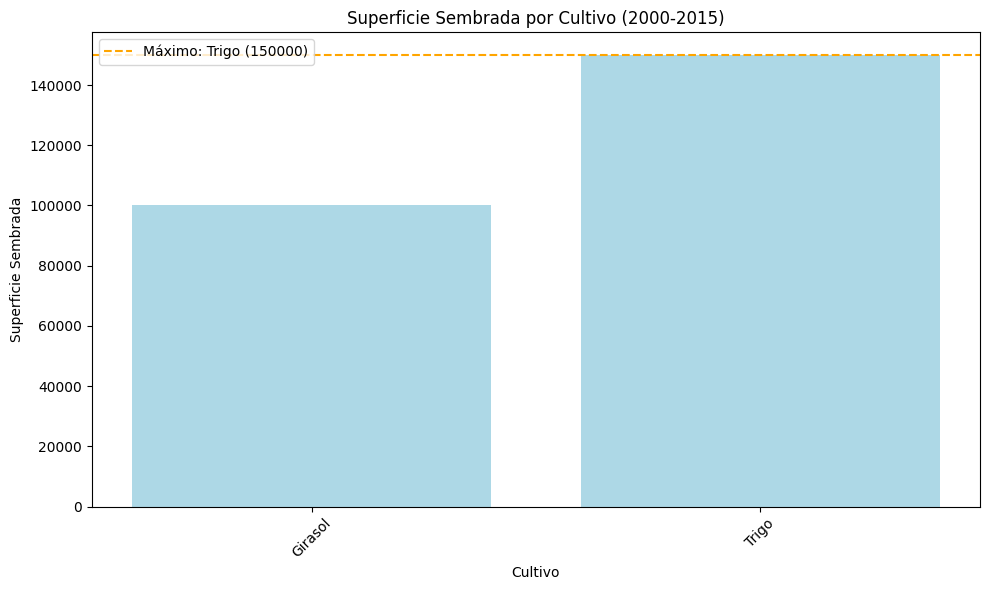

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
    'Cultivo': ['Girasol', 'Girasol', 'Girasol', 'Girasol', 'Girasol', 'Trigo', 'Trigo', 'Trigo', 'Trigo', 'Trigo'],
    'Campaña': ['1999/00', '2000/01', '2001/02', '2002/03', '2003/04', '2000/01', '2001/02', '2002/03', '2003/04', '2004/05'],
    'Sup. Sembrada': [30000, 44000, 22000, 20000, 14000, 40000, 30000, 20000, 10000, 50000]
}

df = pd.DataFrame(data)

# Filtrar los datos entre 2000 y 2015
df['Año'] = df['Campaña'].str.split('/').str[0].astype(int)
filtered_df = df[(df['Año'] >= 2000) & (df['Año'] <= 2015)]

# Agrupar por cultivo y sumar la superficie sembrada
grouped = filtered_df.groupby('Cultivo')['Sup. Sembrada'].sum().reset_index()

# Obtener el cultivo más sembrado
max_cultivo = grouped.loc[grouped['Sup. Sembrada'].idxmax()]

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(grouped['Cultivo'], grouped['Sup. Sembrada'], color='lightblue')
plt.axhline(y=max_cultivo['Sup. Sembrada'], color='orange', linestyle='--', label=f'Máximo: {max_cultivo["Cultivo"]} ({max_cultivo["Sup. Sembrada"]})')
plt.title('Superficie Sembrada por Cultivo (2000-2015)')
plt.xlabel('Cultivo')
plt.ylabel('Superficie Sembrada')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


pregunta 2

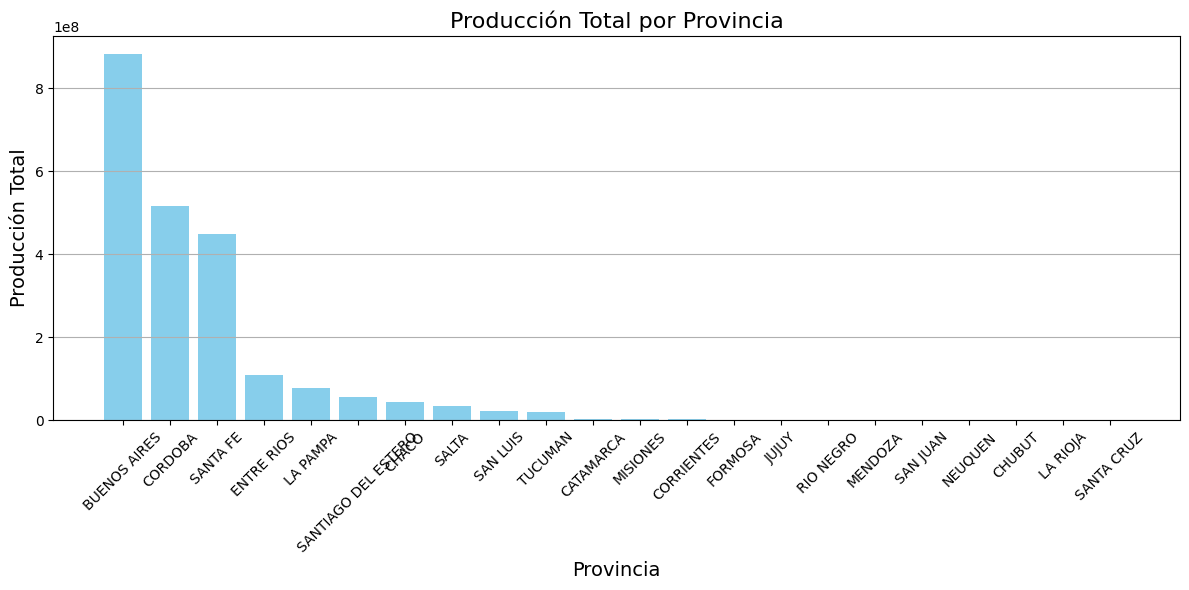

In [37]:

import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por provincia y sumar la producción
produccion_por_provincia = df_cultivos.groupby('Provincia')['Producción'].sum().reset_index()

# Ordenar los datos por producción, de mayor a menor
produccion_por_provincia = produccion_por_provincia.sort_values(by='Producción', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(produccion_por_provincia['Provincia'], produccion_por_provincia['Producción'], color='skyblue')
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Producción Total', fontsize=14)
plt.title('Producción Total por Provincia', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


El archivo `datos/datos-magyp-produccion-estimaciones.csv` es una descarga del dataset completo de estimaciones de producción primaria https://datos.magyp.gob.ar/reportes.php?reporte=Estimaciones (abajo de todo, "Descargar Dataset").

In [5]:
df_estim = pd.read_csv("data/datos-magyp-produccion-estimaciones.csv",
                     sep=";", encoding="latin1", thousands=".", decimal=",")

In [6]:
df_estim.head()

,ID Provincia,Provincia,ID Departamento,Departamento,Id Cultivo,Cultivo,ID Campaña,Campana,Sup. Sembrada (Ha),Sup. Cosechada (Ha),Producción (Tn),Rendimiento (Kg/Ha)
0,6,BUENOS AIRES,854,25 de Mayo,1,Ajo,1,1969/70,3,3,10,3333
1,6,BUENOS AIRES,854,25 de Mayo,1,Ajo,2,1970/71,1,1,3,3000
2,6,BUENOS AIRES,14,Adolfo Gonzales Chaves,1,Ajo,1,1969/70,15,15,82,5467
3,6,BUENOS AIRES,14,Adolfo Gonzales Chaves,1,Ajo,2,1970/71,10,10,55,5500
4,6,BUENOS AIRES,14,Adolfo Gonzales Chaves,1,Ajo,3,1971/72,8,8,44,5500


### COMTRADE
Queremos sumar datos de precios internacionales de estos 4 cultivos a lo largo del tiempo. 

Naciones Unidas recopila datos de comercio exterior de (casi) todos los países del mundo y los disponibiliza en una base de datos llamada **Comtrade**.

Usamos la **API de UN Comtrade** (https://comtrade.un.org/data/doc/api) para descargar montos y cantidades totales exportadas por la Argentina, y así construir un precio promedio por tonelada exportada.

Nota: esta metodología tiene sus más y sus menos, para ver una discusión en mayor detalle sobre el tema ver el jupyter auxiliar **Precios internacionales de cultivos (COMTRADE vs. WB)**.

In [7]:
API_COMTRADE = "http://comtrade.un.org/api/get"

In [8]:
params = {
    "freq": "A", # frecuencia anual
    "r": 32, # reporter (reporta los datos): 32 es el código de la Argentina
    "ps": "ALL", # período (any para tomar todos los años)
    "px": "S1", # sistema de clasificación de productos: SITC Rev 1 es la serie más larga
    "fmt": "JSON", # formato devuelto (CSV o JSON)
    "p": 0, # partner (contraparte comercial del reporter): 0 es el código del Mundo
    "rg": 2, # 1: importaciones, 2: exportaciones
    "cc": "2214,041,4216,044", # commodity code: 2214 "Soya" / 041 "Wheat" / 4216 "Sunflower" / 044 "Corn"
    "max": 50000, # cantidad máxima de resultados (50.000 es un máximo absoluto)
    "head": "H", # M: machine readable headers, H: human readable headers
}

In [16]:
# si internet funciona
# res = requests.get(API_COMTRADE, params=params)
# json_res = res.json()

# si internet no funciona
with open("data/comtrade-cultivos-principales.json", "rb") as f:
    json_res = json.load(f)

Creamos un **DataFrame a partir de un JSON** con la siguiente estructura: `[{}, {}, {}, ...]` donde cada objeto es una fila del dataset.

In [17]:
df_comtrade = pd.DataFrame(json_res["dataset"])

In [18]:
df_comtrade.head(3)

,estCode,aggrLevel,AltQuantity,rgCode,period,rtCode,FOBValue,cmdCode,cstDesc,rt3ISO,...,TradeQuantity,ptCode,qtCode,CIFValue,pt3ISO2,cstCode,ptTitle,qtAltCode,IsLeaf,GrossWeight
0,0,3,None,2,1962,32,None,041,,ARG,...,2832336128,0,8,None,,,World,None,0,None
1,0,3,None,2,1963,32,None,041,,ARG,...,1830655616,0,8,None,,,World,None,0,None
2,0,3,None,2,1964,32,None,041,,ARG,...,3710008576,0,8,None,,,World,None,0,None


In [19]:
df_comtrade.head(3).transpose()

,0,1,2
estCode,0,0,0
aggrLevel,3,3,3
AltQuantity,None,None,None
rgCode,2,2,2
period,1962,1963,1964
rtCode,32,32,32
FOBValue,None,None,None
cmdCode,041,041,041
cstDesc,,,
rt3ISO,ARG,ARG,ARG


In [21]:
columns = [
    "rgDesc", # descripción del tipo de flujo de comercio (Importación, Exportación, Re-Exportación) ("trade regime")
    "rtTitle", # nombre del país que reporta el flujo de comercio ("reporter")
    "ptTitle", # nombre del país que es contraparte del flujo de comercio reportado ("partner")
    "yr", # año
    "cmdCode", # código de la mercadería ("commodity code")
    "cmdDescE", # descripción de la mercadería ("commodity description")
    "TradeValue", # valor del flujo comercial ("trade value")
    "TradeQuantity", # cantidad física involucrada en el flujo comercial ("trade quantity")
    "qtDesc" # unidad de la cantidad utilizada ("quantity description")
]

In [47]:
df_comtrade[columns].head(5)
print(df_comtrade)

     estCode  aggrLevel AltQuantity  rgCode  period  rtCode FOBValue cmdCode  \
0          0          3        None       2    1962      32     None     041   
1          0          3        None       2    1963      32     None     041   
2          0          3        None       2    1964      32     None     041   
3          0          3        None       2    1965      32     None     041   
4          0          3        None       2    1966      32     None     041   
..       ...        ...         ...     ...     ...     ...      ...     ...   
202        0          4        None       2    2011      32     None    4216   
203        0          4        None       2    2012      32     None    4216   
204        0          4        None       2    2013      32     None    4216   
205        0          4        None       2    2014      32     None    4216   
206        0          4        None       2    2015      32     None    4216   

    cstDesc rt3ISO  ... ptCode qtCode C

pregunta 5

In [44]:
df_comtrade[columns].tail(5)



,rgDesc,rtTitle,ptTitle,yr,cmdCode,cmdDescE,TradeValue,TradeQuantity,qtDesc
202,Export,Argentina,World,2011,4216,Sunflower seed oil,1176553428,908109965,Weight in kilograms
203,Export,Argentina,World,2012,4216,Sunflower seed oil,928531664,790948144,Weight in kilograms
204,Export,Argentina,World,2013,4216,Sunflower seed oil,528181934,447704974,Weight in kilograms
205,Export,Argentina,World,2014,4216,Sunflower seed oil,366774725,349370968,Weight in kilograms
206,Export,Argentina,World,2015,4216,Sunflower seed oil,405056803,439193748,Weight in kilograms


Ahora creamos el campo **"precio de la tonelada exportada"** ("precio_ton") como una división entre "trade value" y "trade quantity".

In [24]:
df_comtrade["precio_ton"] = df_comtrade.TradeValue / df_comtrade.TradeQuantity * 1000

df_precios = df_comtrade.pivot(index='yr', columns='cmdDescE', values='precio_ton')
df_precios.columns = ['Maiz', 'Soja', 'Girasol','Trigo']

In [28]:
df_precios.tail()
df_precios

,Maiz,Soja,Girasol,Trigo
yr,,,,
1962,41.442731,NaN,206.103370,61.208515
1963,51.707318,NaN,195.822315,63.577651
1964,50.337395,180.000000,101.099279,65.298040
1965,54.819864,NaN,252.634152,55.951010
1966,53.498676,75.130435,240.651481,55.320112
1967,51.768860,NaN,210.695367,59.260600
1968,48.342370,203.924528,194.393995,57.410968
1969,48.367107,NaN,231.958301,59.063953
1970,50.741679,NaN,209.644304,54.692422


pregunta 1

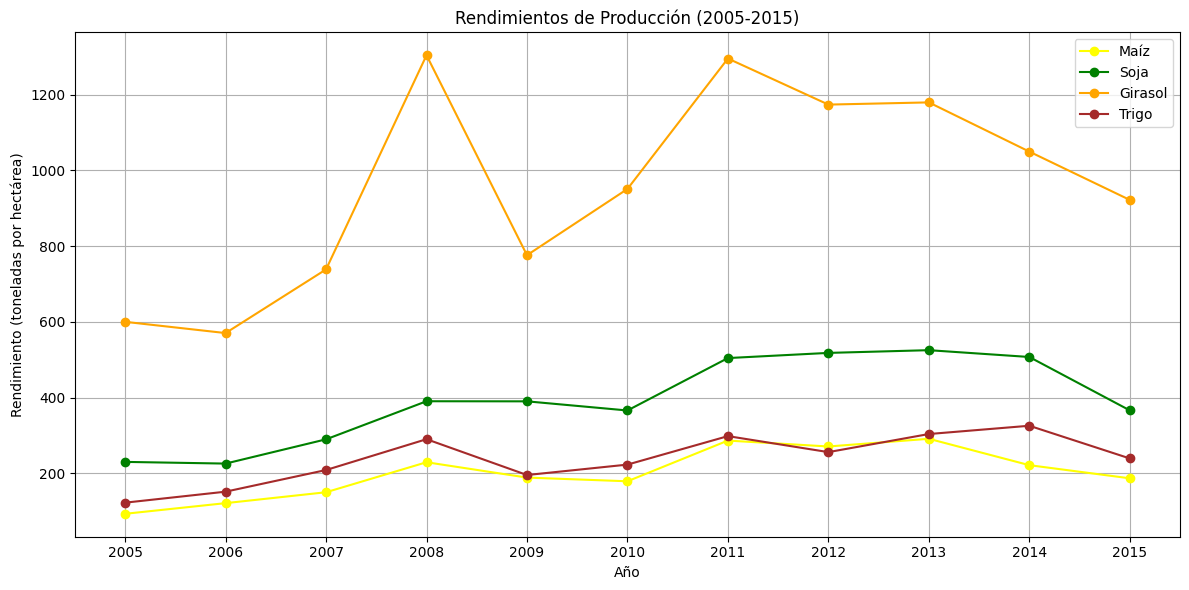

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Data como un diccionario
data = {
    "yr": [
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015
    ],
    "Maiz": [
        93.387284, 121.527608, 150.302309, 229.538894, 189.000230,
        179.265591, 286.736868, 271.127216, 291.441014, 221.789213, 187.096364
    ],
    "Soja": [
        230.441120, 225.978790, 290.061278, 390.610502, 390.346051,
        366.206840, 504.611748, 518.252314, 525.449603, 507.460665, 366.511898
    ],
    "Girasol": [
        600.294458, 570.630487, 738.765449, 1304.225165, 776.264792,
        951.162141, 1295.606780, 1173.947586, 1179.754447, 1049.814548, 922.273609
    ],
    "Trigo": [
        122.765547, 151.795842, 209.007641, 290.379616, 195.773929,
        223.278901, 298.504060, 256.266138, 304.016832, 325.886841, 239.572116
    ],
}

# Convertir el diccionario a un DataFrame de pandas
df = pd.DataFrame(data)

# Configurar el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['yr'], df['Maiz'], marker='o', label='Maíz', color='yellow')
plt.plot(df['yr'], df['Soja'], marker='o', label='Soja', color='green')
plt.plot(df['yr'], df['Girasol'], marker='o', label='Girasol', color='orange')
plt.plot(df['yr'], df['Trigo'], marker='o', label='Trigo', color='brown')

# Añadir títulos y etiquetas
plt.title('Rendimientos de Producción (2005-2015)')
plt.xlabel('Año')
plt.ylabel('Rendimiento (toneladas por hectárea)')
plt.xticks(df['yr'])  # configurar los ticks del eje x
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


pregunta 3

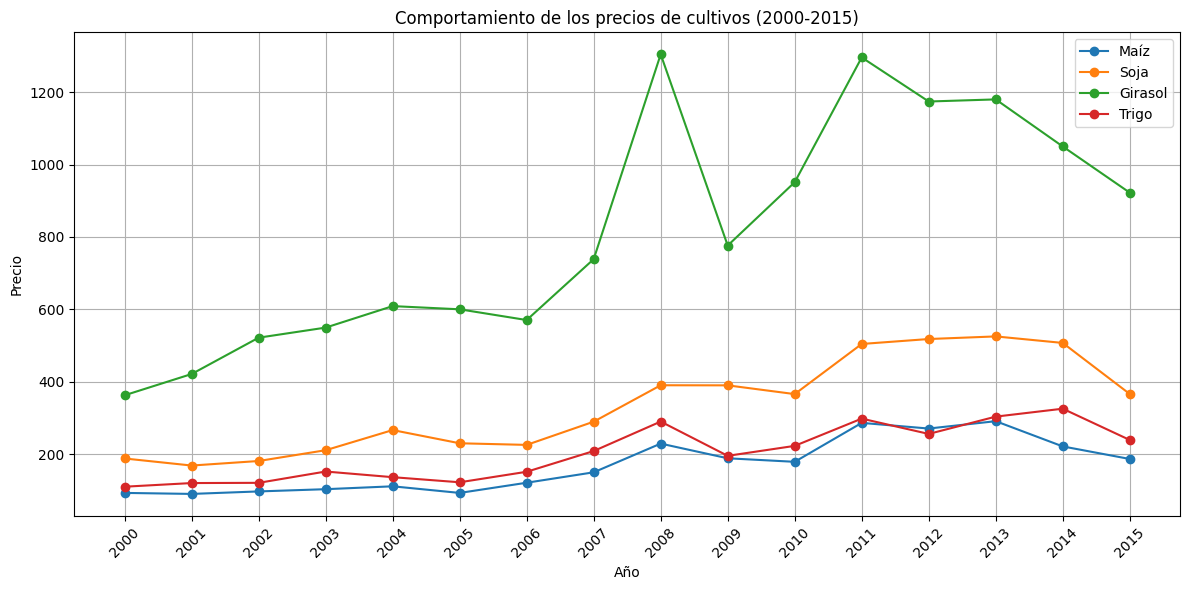

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos desde 2000 hasta 2015
data = {
    'yr': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'Maiz': [93.409769, 90.642030, 97.516639, 103.696190, 111.653987, 93.387284, 121.527608, 150.302309, 229.538894, 189.000230, 179.265591, 286.736868, 271.127216, 291.441014, 221.789213, 187.096364],
    'Soja': [188.450060, 168.969997, 181.517508, 211.299204, 266.896660, 230.441120, 225.978790, 290.061278, 390.610502, 390.346051, 366.206840, 504.611748, 518.252314, 525.449603, 507.460665, 366.511898],
    'Girasol': [362.989864, 421.654456, 521.968653, 549.772377, 609.119807, 600.294458, 570.630487, 738.765449, 1304.225165, 776.264792, 951.162141, 1295.606780, 1173.947586, 1179.754447, 1049.814548, 922.273609],
    'Trigo': [110.546940, 120.621531, 121.233871, 152.453519, 136.868339, 122.765547, 151.795842, 209.007641, 290.379616, 195.773929, 223.278901, 298.504060, 256.266138, 304.016832, 325.886841, 239.572116]
}

# Creación del DataFrame
df = pd.DataFrame(data)

# Establecer el año como índice
df.set_index('yr', inplace=True)

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Maiz'], marker='o', label='Maíz')
plt.plot(df.index, df['Soja'], marker='o', label='Soja')
plt.plot(df.index, df['Girasol'], marker='o', label='Girasol')
plt.plot(df.index, df['Trigo'], marker='o', label='Trigo')

plt.title('Comportamiento de los precios de cultivos (2000-2015)')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.xticks(df.index, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Precios de Soja (Exportación - USD/ton)'}, xlabel='yr'>

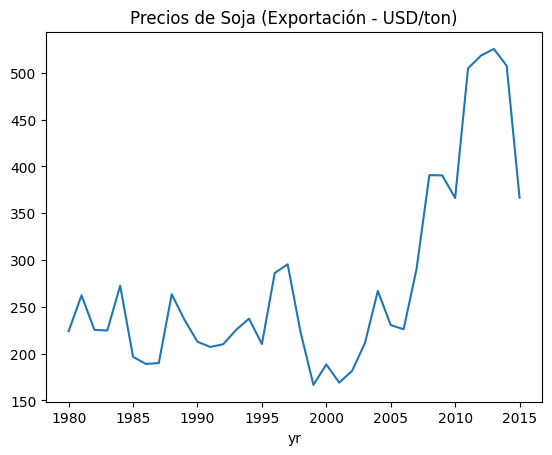

In [34]:
df_precios.Soja[df_precios.Soja.index >= 1980].plot.line(title="Precios de Soja (Exportación - USD/ton)")

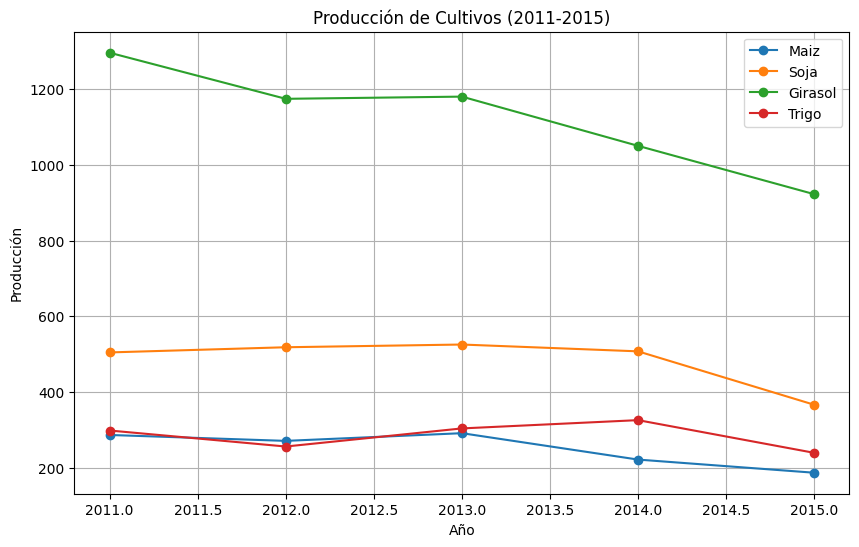

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos
data = {
    'yr': [2011, 2012, 2013, 2014, 2015],
    'Maiz': [286.736868, 271.127216, 291.441014, 221.789213, 187.096364],
    'Soja': [504.611748, 518.252314, 525.449603, 507.460665, 366.511898],
    'Girasol': [1295.606780, 1173.947586, 1179.754447, 1049.814548, 922.273609],
    'Trigo': [298.504060, 256.266138, 304.016832, 325.886841, 239.572116]
}

df = pd.DataFrame(data)

# Definir el índice como el año
df.set_index('yr', inplace=True)

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Maiz'], marker='o', label='Maiz')
plt.plot(df.index, df['Soja'], marker='o', label='Soja')
plt.plot(df.index, df['Girasol'], marker='o', label='Girasol')
plt.plot(df.index, df['Trigo'], marker='o', label='Trigo')

# Añadir título y etiquetas
plt.title('Producción de Cultivos (2011-2015)')
plt.xlabel('Año')
plt.ylabel('Producción')
plt.grid()
plt.legend()

# Mostrar el gráfico
plt.show()


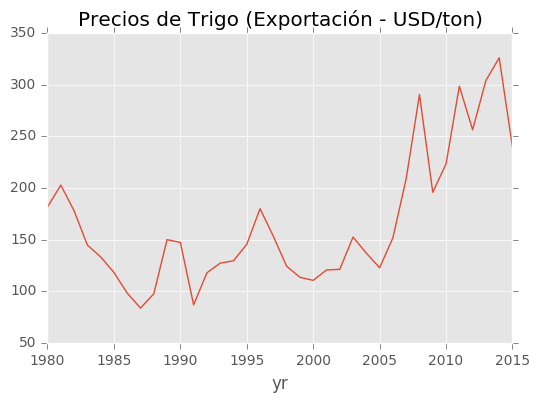

In [18]:
df_precios.Trigo[df_precios.Trigo.index >= 1980].plot.line(title="Precios de Trigo (Exportación - USD/ton)")

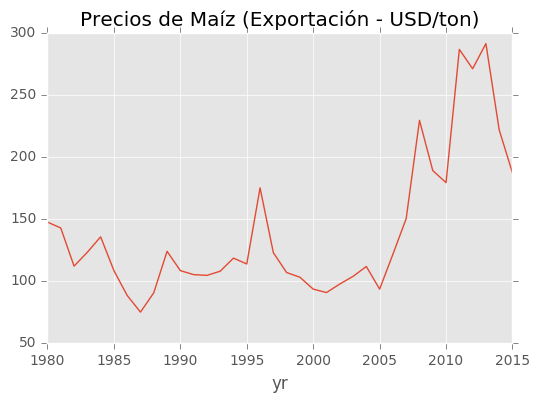

In [19]:
df_precios.Maiz[df_precios.Maiz.index >= 1980].plot.line(title="Precios de Maíz (Exportación - USD/ton)")

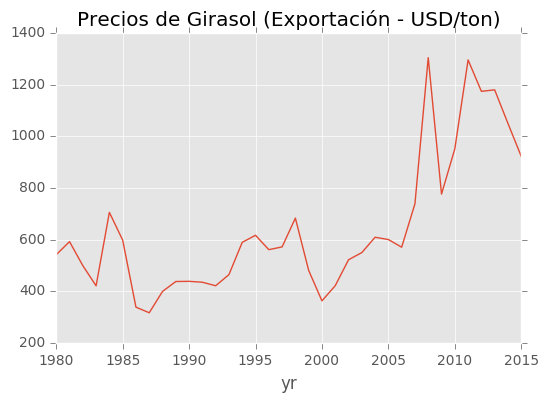

In [20]:
df_precios.Girasol[df_precios.Girasol.index >= 1980].plot.line(title="Precios de Girasol (Exportación - USD/ton)")

### Cartografía censal de INDEC
En algún momento vamos a querer mapear los cultivos. INDEC publica los **shapefiles de la cartografía censal** (http://www.indec.gov.ar/codgeo.asp) que se producen para realizar el Censo Nacional que se hace cada 10 años. Vamos a descargarlos.

In [61]:
URL_SHP_PROVINCIAS = "http://www.indec.gov.ar/ftp/cuadros/territorio/codgeo/Codgeo_Pais_x_prov_datos.zip"
URL_SHP_DEPARTAMENTOS = "http://www.indec.gov.ar/ftp/cuadros/territorio/codgeo/Codgeo_Pais_x_dpto_con_datos.zip"

In [62]:
hay_internet = False

In [63]:
if hay_internet:
    # descargamos shp de provincias (si hay internet)
    res = requests.get(URL_SHP_PROVINCIAS, stream=True)

    if res.status_code == 200:
        with open("data/provincias.zip", 'wb') as f:
            res.raw.decode_content = True
            shutil.copyfileobj(res.raw, f)

In [38]:
if hay_internet:
    # descargamos shp de departamentos (si hay internet)
    res = requests.get(URL_SHP_DEPARTAMENTOS, stream=True)

    if res.status_code == 200:
        with open("data/departamentos.zip", 'wb') as f:
            res.raw.decode_content = True
            shutil.copyfileobj(res.raw, f)       

## 2.2 Exploración inicial

In [60]:
# Funciones auxiliares

def pivotear_tabla(df, grupo, campo, columnas):
    df_out = df.groupby(grupo)[campo].sum() # Agrupar y sumar
    df_out = df_out.reset_index(level=1) # Volver el cultivo a una columna normal (sacarlo del indice)
    df_out = df_out.pivot(columns=columnas, values=campo) # Pivotear para convertir en un tabla
    df_out.index = df_out.index.str.slice(0,4).astype(int) # Extraer 4 caracteres del indice y convertir a int
    df_out = df_out[['Maiz', 'Soja', 'Girasol','Trigo']]
    return df_out

### Series en el tiempo

#### Precios vs t

Text(0, 0.5, 'Precio por tonelada [USD/ton]')

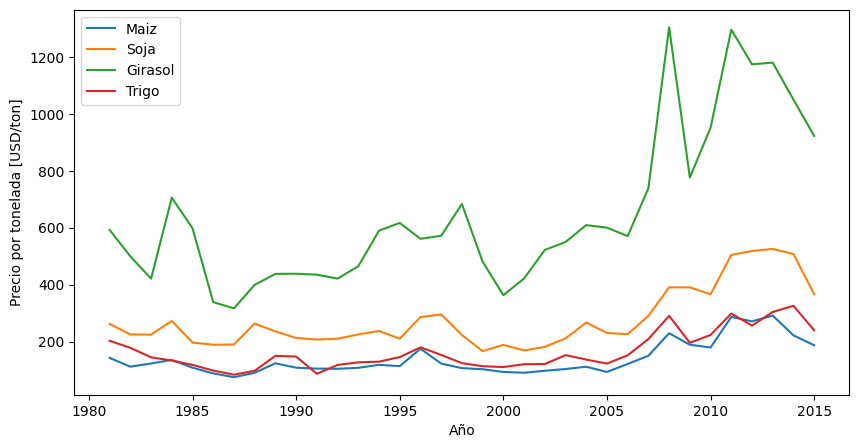

In [40]:
df_precios[df_precios.index > 1980].plot(figsize=(10,5))
plt.xlabel(u"Año")
plt.ylabel(u"Precio por tonelada [USD/ton]")

#### Sup. Total Sembrada vs t

Text(0, 0.5, 'Superficie Sembrada [hA]')

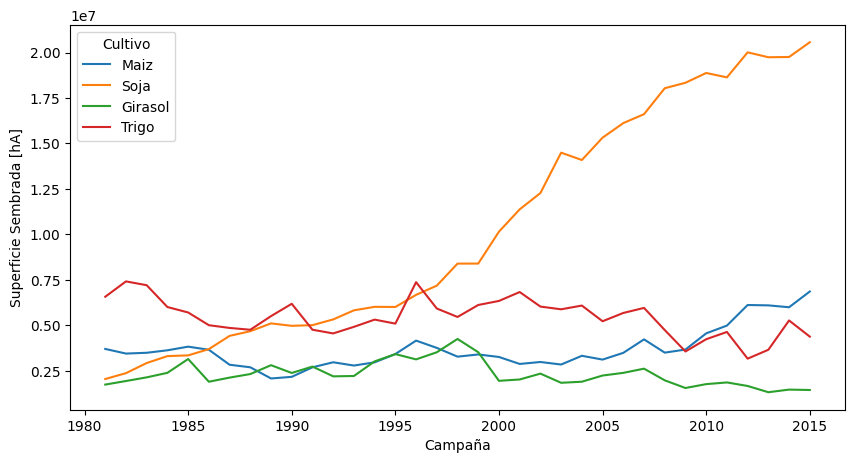

In [41]:
# Agrupar por año

df_sup = pivotear_tabla(df_cultivos, grupo=['Campaña', 'Cultivo'], 
                        campo='Sup. Sembrada',
                        columnas='Cultivo')

df_sup[df_sup.index > 1980].plot(figsize=(10,5))
plt.ylabel(u"Superficie Sembrada [hA]")

#### Rendimiento vs t

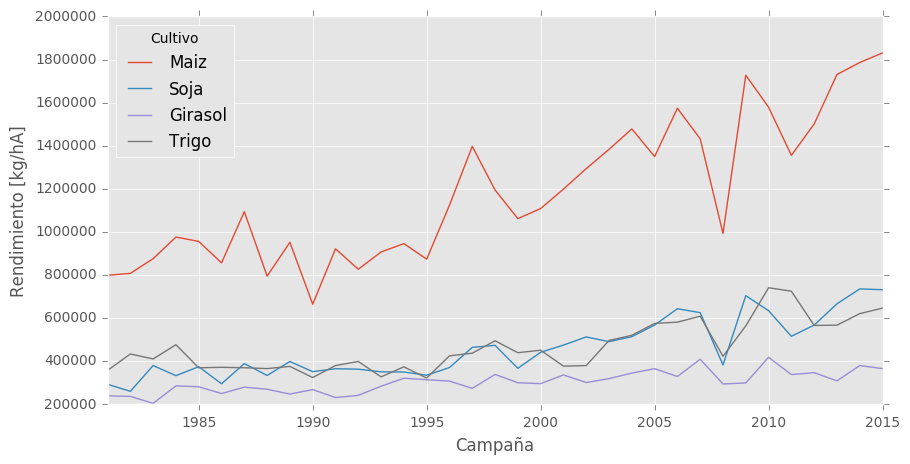

In [28]:
# Agrupar por año

df_ren = pivotear_tabla(df_cultivos,grupo=['Campaña', 'Cultivo'], 
                        campo='Rendimiento',
                        columnas='Cultivo')

df_ren[df_ren.index > 1980].plot(figsize=(10,5))
plt.ylabel(u"Rendimiento [kg/hA]")

##### Detrending del rendimiento

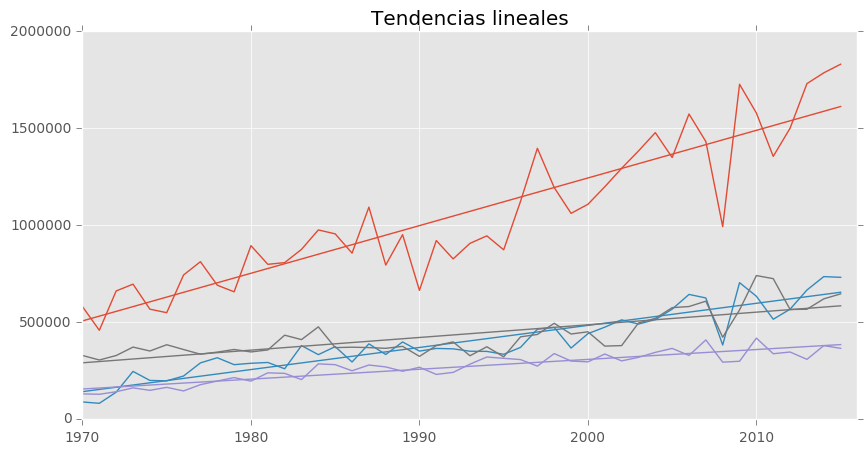

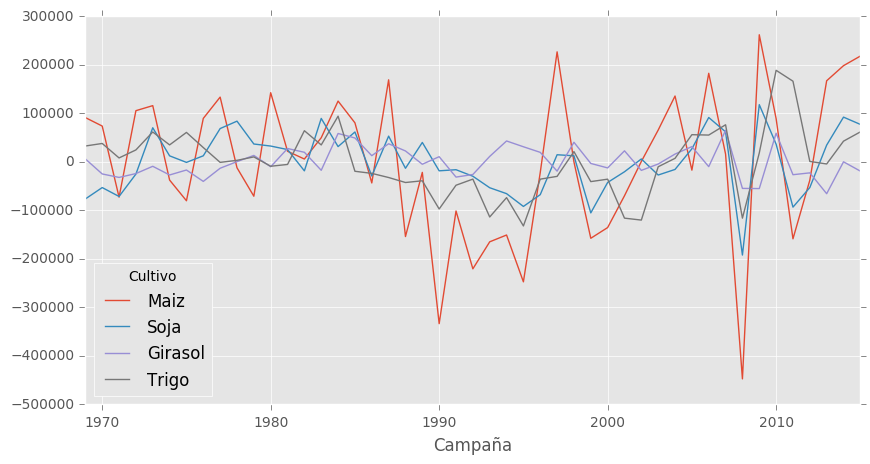

In [29]:
from scipy import signal

x = df_ren.index
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes()

for col in df_ren.columns:
    y = df_ren[col]
    p = np.polyfit(x, y, 1)
    data_plt, = plt.plot(x, y)
    plt.plot(x, np.polyval(p, x.values), color=data_plt.get_color())

plt.title("Tendencias lineales")    
plt.xlim((1970,2016))

df_ren_detrended = pd.DataFrame(signal.detrend(df_ren, axis=0), columns=df_ren.columns, index=df_ren.index)
df_ren_detrended.plot(figsize=(10,5))

#### Rendimientos relativos vs t

Aca los rendimientos estan normalizados al promedio y se ve que siguen crecimiento parecidos.

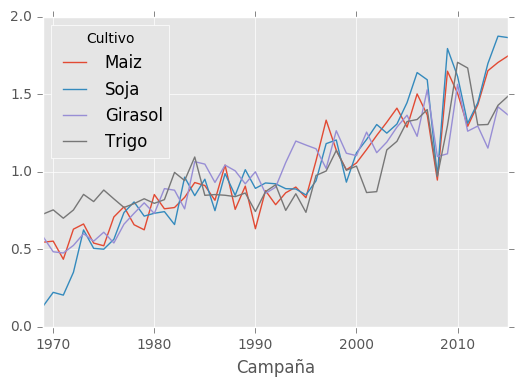

In [30]:
# Tomar valores relativizados al promedio
(df_ren / df_ren.mean(axis=0)).plot()

#### Produccion valuada (escala logaritmica)

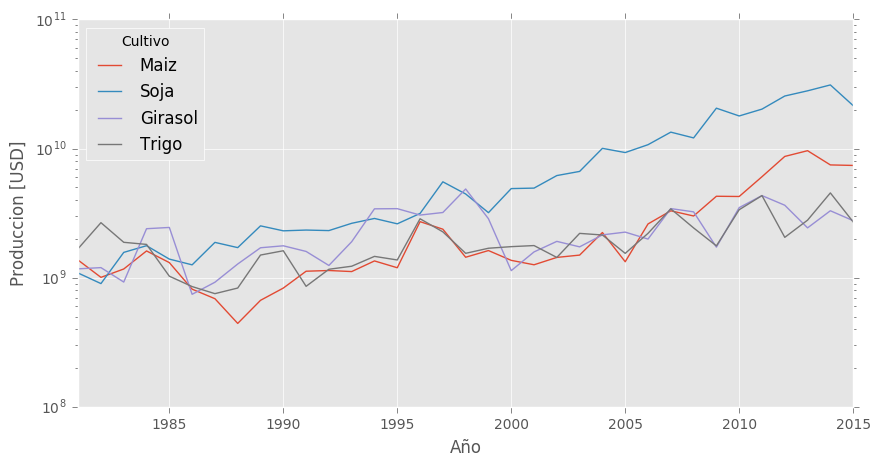

In [31]:
df_prod = pivotear_tabla(df_cultivos, grupo=['Campaña', 'Cultivo'], 
                        campo='Producción',
                        columnas='Cultivo')

df_prod_dolars = df_prod * df_precios
df_prod_dolars[df_prod_dolars.index > 1980].plot(figsize=(10,5), logy=True)

plt.xlabel("Año")
plt.ylabel("Produccion [USD]")

#### Matriz de correlaciones entre precios

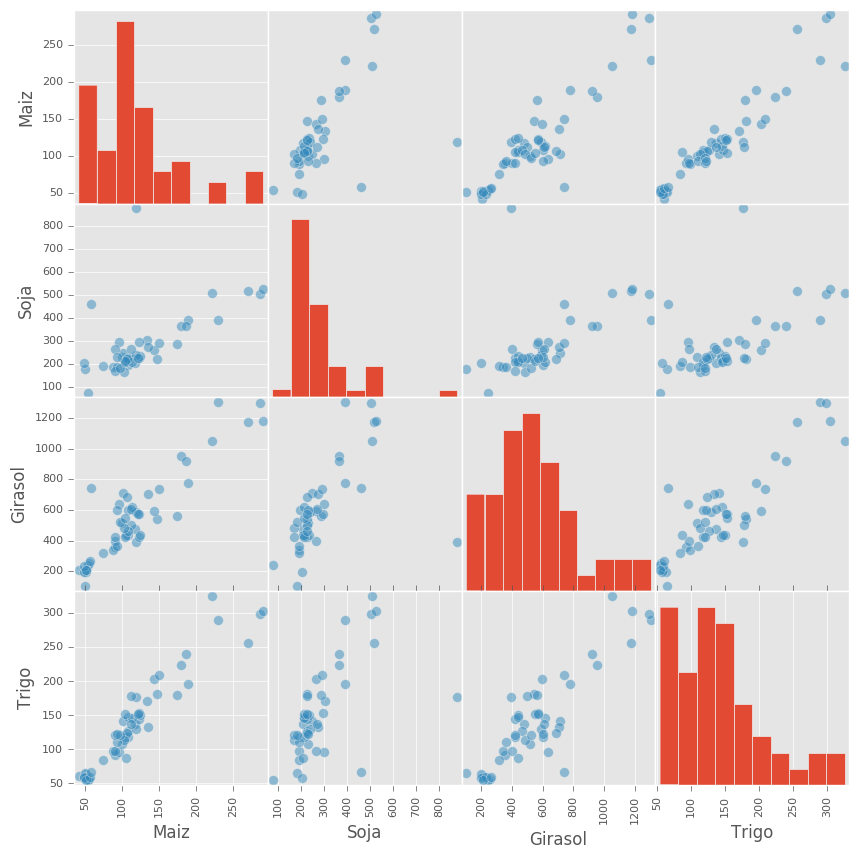

In [32]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_precios, figsize=(10,10), s=200);

#### Entropia de cultivos vs t ¿Como varió la diversidad de cultivos en el tiempo?

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


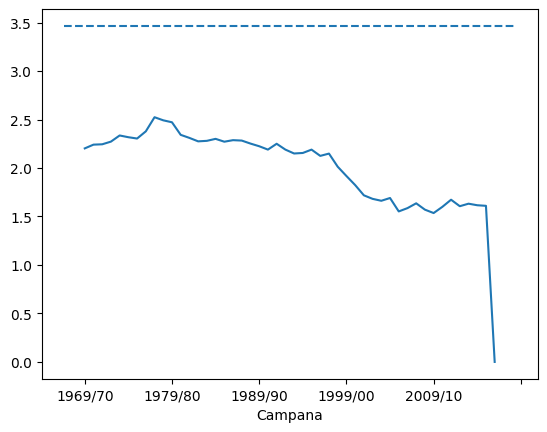

In [46]:
df_all_cult = df_estim.groupby(['Campana', 'Cultivo'])['Sup. Sembrada (Ha)'].sum().reset_index(level=1)
df_all_cult = df_all_cult.pivot(columns='Cultivo', values= 'Sup. Sembrada (Ha)').fillna(0)

p = df_all_cult.div(df_all_cult.sum(axis=1), axis=0)
#df_all_cult / df_all_cult.sum(axis=1)

entropy = (-p*np.log(p)).sum(axis=1)
entropy.plot()

plt.hlines(np.log(p.shape[1]), plt.xlim()[0], plt.xlim()[1], linestyles='--') # MAX ENTROPY


## 2.3 - Mapas

In [48]:
# Plot helper function
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import shapely

def plot_polygon_collection(ax, geoms, values=None, colormap='Set1',  facecolor=None, edgecolor=None,
                            alpha=0.5, linewidth=1.0, **kwargs):
    """ Plot a collection of Polygon geometries """

    patches = []

    for poly in geoms:
        if isinstance(poly, float):
            continue
            
        if poly.geom_type == 'Polygon':
            a = np.asarray(poly.exterior)
            if poly.has_z:
                poly = shapely.geometry.Polygon(zip(*poly.exterior.xy))

            patches.append(Polygon(a))
        elif poly.geom_type == 'MultiPolygon':
            for subpoly in poly:
                a = np.asarray(subpoly.exterior)
                if subpoly.has_z:
                    subpoly = shapely.geometry.Polygon(zip(*subpoly.exterior.xy))

                patches.append(Polygon(a))

                
    patches = PatchCollection(patches, facecolor=facecolor, linewidth=linewidth, edgecolor=edgecolor, alpha=alpha, **kwargs)

    if values is not None:
        patches.set_array(values)
        patches.set_cmap(colormap)

    ax.add_collection(patches, autolim=True)
    ax.autoscale_view()
    return ax, patches

In [ ]:
# Carga inicial de shapfiles y formas de paises
import geopandas as gpd

gf = gpd.read_file('./data/departamentos/pxdptodatos.shp')
gf  = gf[~gf.nombre.str.contains('Antártida')]
gf = gf[gf.geometry.bounds.maxx < -50] # Sacar islas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
# Genero un id de departamento en df_estim que sea compatible con el del shapefile
parte1 = df_estim['ID Provincia'].apply(lambda x: '{:02d}'.format(x))
parte2 = df_estim['ID Departamento'].apply(lambda x: '{:03d}'.format(x))
df_estim['link'] = parte1.str.cat(parte2)

### Mapa de % de superficies cultivadas para dos (o mas campanias)

Tarda en correr

In [ ]:
for campana in ['1980/81','2015/16']:
    fig = plt.figure(figsize=(20,7))
    fig.suptitle(campana, fontsize=18)
    for i, cultivo in enumerate(df_ren.columns):
        gf_merge = pd.merge(gf,df_estim[(df_estim.Cultivo==cultivo) & (df_estim.Campana==campana)][['link','Campana','Sup. Sembrada (Ha)']],
                 on='link',how='left')
        gf_merge['Sup. Sembrada (Ha)'].fillna(0, inplace=True)
        gf_merge['porc_sembrado'] = gf_merge['Sup. Sembrada (Ha)']/gf_merge.geometry.area
        ax= fig.add_subplot(1,4,i+1)
        ax.set_axis_bgcolor('white')
        ax.grid('off')
        ax.set_title(cultivo)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])

        world[world.name=='Argentina'].plot(ax=ax,color='white')
        kw = dict(column='porc_sembrado', k=9, cmap='YlGn', ax=ax, linewidth=0)
        gf_merge.plot(**kw)


### Animacion del cultivo mas sembrado (en sup) en cada depto

In [ ]:
# Definir el dataframe del cultivo mas popular por departamento
df_4cult = df_estim[df_estim.Cultivo.isin(df_ren.columns)]
# Un hack porque no me funciona pivot con multiindex
df_4cult.loc[:,'indice'] = df_4cult['Campana'].str.cat(df_4cult['link'], sep=':')
df_4cult = df_4cult.pivot(index='indice',columns='Cultivo', values='Sup. Sembrada (Ha)')
df_4cult = df_4cult.set_index(df_4cult.index.str.split(':', expand=True))
df_4cult['ganador'] = df_4cult.loc[:,df_ren.columns].values.argmin(axis=1)

In [43]:
from matplotlib import animation
mis_colores = np.array(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#ffffff"])
legend_handles= []

for i in range(4):
    patch = plt.matplotlib.patches.Patch(color=mis_colores[i], label=df_4cult.columns[i])
    legend_handles.append(patch)

# Create the figure and axis
fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'), figsize=(5,10))
plt.legend(handles=legend_handles)
ax.set_axis_bgcolor('white')
ax.grid('off')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
world[world.name=='Argentina'].plot(ax=ax,color='white')
ax, col = plot_polygon_collection(ax, gf.geometry, linewidth=0, alpha=1)

campanas = df_4cult.index.levels[0]

def init():
    return []


def animate(i):
    ax.set_title(campanas[i])
    gf_winner = pd.merge(gf, df_4cult.loc[campanas[i]].ganador.to_frame(),right_index=True, left_on='link', how='left')
    gf_winner.ganador.fillna(-1, inplace=True)
    col.set_color(mis_colores[gf_winner.ganador.astype(int).values])
    return col,
    

anim = animation.FuncAnimation(fig,animate,frames=len(campanas),interval=500,blit=True)


NameError: name 'df_4cult' is not defined

In [ ]:
HTML(anim.to_html5_video())

## 2.4 - Clustering

In [42]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import pairwise_distances

# Defino vectores de cultivos para cada departamenteo (promedio de cultivo)
promedios = df_estim.groupby(['link','Cultivo'])['Sup. Sembrada (Ha)'].mean()
vectores = promedios.reset_index(level=1).pivot(columns='Cultivo')
vectores.columns = vectores.columns.droplevel(0)

gf_clase = pd.merge(gf,vectores,left_on='link',right_index=True)
areas = gf_clase.geometry.area
areas.index = gf_clase.link
vectores = vectores.divide(areas,axis=0)
vectores = vectores.fillna(0)

#ac = AgglomerativeClustering(n_clusters=10) # Clustering jerarquico
ac = KMeans(n_clusters=10) # 
ac.fit(vectores.values)
vectores.loc[:,'clase'] = ac.labels_
gf_clase = pd.merge(gf,vectores,left_on='link',right_index=True)
gf_clase.plot(column='clase',figsize=(10,20), cmap=plt.cm.Set1)

ModuleNotFoundError: No module named 'sklearn'